In [ ]:
#!/usr/bin/env python
# coding=UTF-8  
from __future__ import absolute_import, division, print_function, unicode_literals
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
import datetime


In [ ]:
start_time = datetime.datetime.now()

In [ ]:
CSV_FILE_PATH = 'binary_classification.csv'
df = pd.read_csv(CSV_FILE_PATH)

In [ ]:
df['Label'] = pd.Categorical(df['Label'])
df['Label'] = df['Label'].cat.codes

In [ ]:
columns_counts = df.shape[1]           
for i in range(columns_counts):
  if(df.iloc[:,i].dtypes) != 'float64':     
    df.iloc[:, i] = df.iloc[:,i].astype(float)

In [ ]:
df.shape[1]

80

In [ ]:
features_considered = ['Label','Bwd_Packet_Length_Min','Subflow_Fwd_Bytes','Total_Length_of_Fwd_Packets','Fwd_Packet_Length_Mean','Bwd_Packet_Length_Std','Flow_Duration','Flow_IAT_Std','Init_Win_bytes_forward','Bwd_Packets/s',
                 'PSH_Flag_Count','Average_Packet_Size']
feature_last = ['Bwd_Packet_Length_Min','Subflow_Fwd_Bytes','Total_Length_of_Fwd_Packets','Fwd_Packet_Length_Mean','Bwd_Packet_Length_Std','Flow_Duration','Flow_IAT_Std','Init_Win_bytes_forward','Bwd_Packets/s',
                 'PSH_Flag_Count','Average_Packet_Size']
feature = df[features_considered]

In [ ]:
feature.shape

(50960, 12)

In [ ]:
train, test = train_test_split(feature,test_size=0.2)
print(len(train),len(test))

40768 10192


In [ ]:
train

,Label,Bwd_Packet_Length_Min,Subflow_Fwd_Bytes,Total_Length_of_Fwd_Packets,Fwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Duration,Flow_IAT_Std,Init_Win_bytes_forward,Bwd_Packets/s,PSH_Flag_Count,Average_Packet_Size
28363,3.0,6.0,2.0,2.0,2.000000,0.000000,42.0,0.000000e+00,1024.0,23809.523810,1.0,5.000000
26841,2.0,0.0,351.0,351.0,117.000000,1754.831473,107450.0,3.362727e+04,29200.0,55.839926,1.0,1327.333333
12680,3.0,6.0,2.0,2.0,2.000000,0.000000,47.0,0.000000e+00,1024.0,21276.595740,1.0,5.000000
50099,1.0,0.0,26.0,26.0,8.666667,2436.833027,73316.0,2.312269e+04,8192.0,68.197938,1.0,1453.375000
33368,0.0,0.0,1011.0,1011.0,67.400000,777.262963,115396713.0,1.227558e+07,8192.0,0.129986,1.0,170.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
16184,3.0,6.0,2.0,2.0,2.000000,0.000000,54.0,0.000000e+00,1024.0,18518.518520,1.0,5.000000
10432,2.0,0.0,1470.0,1470.0,147.000000,2362.781391,101591784.0,2.580000e+07,251.0,0.059060,0.0,816.562500
49728,2.0,0.0,413.0,413.0,82.600000,2429.118623,98824713.0,2.980000e+07,0.0,0.070832,0.0,1001.166667
26175,0.0,0.0,1392.0,1392.0,87.000000,865.509407,21580859.0,2.496563e+06,29200.0,0.741398,1.0,548.000000


In [ ]:
def normalize_dataset(dataset, dataset_mean, dataset_std, insert_label):
    dataset = (dataset-dataset_mean)/dataset_std
    final_dataset = pd.DataFrame(dataset, columns=feature_last)
    final_dataset.insert(0, 'Label', insert_label)
    return final_dataset

train.reset_index(drop=True,inplace=True)                                   
train_Label = train['Label']
train_other = train[feature_last]
train_dataset = train_other.values
train_mean = train_dataset.mean(axis=0)
train_std = train_dataset.std(axis=0)
train = normalize_dataset(train_dataset, train_mean, train_std, train_Label)

In [ ]:
train.shape

(32614, 12)

In [ ]:
test.reset_index(drop=True,inplace=True)
test_Label = test['Label']
test_other = test[feature_last]
test_dataset = test_other.values
test = normalize_dataset(test_dataset, train_mean, train_std, test_Label)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')


26091 train examples
6523 validation examples
10192 test examples


In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Label')

  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [ ]:
feature_use = []
for header in feature_last:
  feature_use.append(feature_column.numeric_column(header))

feature_layer = tf.keras.layers.DenseFeatures(feature_use,dtype='float64')#特征列，传进来的都以这些特征为输入，并且数据类型是float64

batch_size = 50                                                             
train_ds = df_to_dataset(train, batch_size=batch_size)
# print(list(train_ds.as_numpy_iterator())[0])
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(20, activation='selu'),
  layers.Dense(20, activation='selu'),
  layers.Dense(20, activation='selu'),
  layers.Dense(20, activation='selu'),
  layers.Dense(4, activation='softmax')
])

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'
                       ],
              run_eagerly=True)


In [ ]:
model.fit(train_ds,
    validation_data=val_ds,
    epochs=10)
# callbacks=[tensorboard_callback]



流式输出内容被截断，只能显示最后 5000 行内容。
       [ 0.64145677],
       [-0.2925534 ],
       [ 1.90604764],
       [-0.77489782],
       [ 0.87388552],
       [-0.77489782],
       [ 0.36661732],
       [ 0.80759034],
       [-0.77489782],
       [ 1.28397393],
       [-0.77489782],
       [-0.77489782],
       [-0.77489782],
       [-0.77489782],
       [-0.77489782],
       [-0.77489782],
       [ 2.99001961],
       [-0.40501595],
       [-0.77489782],
       [ 1.90604764],
       [ 0.87388552],
       [ 0.87388552],
       [-0.77489782],
       [ 0.93468688],
       [ 0.29788176],
       [-0.77489782],
       [ 2.98872125]])>, 'Flow_Duration': <tf.Tensor: shape=(50, 1), dtype=float64, numpy=
array([[-0.56360321],
       [-0.56360321],
       [-0.55951736],
       [ 2.10923746],
       [-0.5625715 ],
       [-0.55986431],
       [-0.56358319],
       [-0.56358   ],
       [ 2.10774198],
       [-0.3703478 ],
       [-0.51595781],
       [-0.54729228],
       [-0.35901297],
       [-0.56360214],
  

In [ ]:

loss, accuracy = model.evaluate(test_ds)
print("loss:",loss)
print("Accuracy:", accuracy)
# print("recall:",recall)
# print("FPR:",FP/(FP+TN))

end_time = datetime.datetime.now()
print("spend_time:",(end_time-start_time).seconds)

流式输出内容被截断，只能显示最后 5000 行内容。
       [-0.22617797],
       [ 0.36652391],
       [-0.22624534],
       [ 0.75552994],
       [-0.22624719],
       [-0.2262374 ],
       [-0.22624719],
       [-0.22496399],
       [ 0.10797481],
       [-0.22605607],
       [-0.22596775],
       [ 0.33476831],
       [-0.22624499],
       [ 0.17653317],
       [-0.22624375]])>, 'PSH_Flag_Count': <tf.Tensor: shape=(50, 1), dtype=float64, numpy=
array([[ 0.84594524],
       [ 0.84594524],
       [-1.18210961],
       [ 0.84594524],
       [ 0.84594524],
       [ 0.84594524],
       [ 0.84594524],
       [-1.18210961],
       [ 0.84594524],
       [ 0.84594524],
       [-1.18210961],
       [ 0.84594524],
       [ 0.84594524],
       [-1.18210961],
       [ 0.84594524],
       [ 0.84594524],
       [-1.18210961],
       [-1.18210961],
       [ 0.84594524],
       [ 0.84594524],
       [ 0.84594524],
       [ 0.84594524],
       [-1.18210961],
       [-1.18210961],
       [-1.18210961],
       [ 0.84594524],
 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features_2 (DenseFeatu multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  240       
_________________________________________________________________
dense_11 (Dense)             multiple                  420       
_________________________________________________________________
dense_12 (Dense)             multiple                  420       
_________________________________________________________________
dense_13 (Dense)             multiple                  420       
_________________________________________________________________
dense_14 (Dense)             multiple                  84        
Total params: 1,584
Trainable params: 1,584
Non-trainable params: 0
____________________________________________________

In [ ]:
#model.save('Final_Model')

In [ ]:
#data, labels = load_data(<the path of the data>)

In [ ]:
#predict = model.predict(data)

In [ ]:
CSV2_FILE_PATH = 'time.csv'
df2 = pd.read_csv(CSV2_FILE_PATH)

In [ ]:
df2=df2.rename(columns=lambda x: x.strip())
df2['time']=df2['time'].apply(lambda x:datetime.datetime.strptime(x,'%Y/%m/%d %H:%M'))

In [ ]:
df_time=df2[df2.time.between('2015-1-19','2015-1-20')]

In [ ]:
df_time['Label'] = pd.Categorical(df_time['Label'])
df_time['Label'] = df_time['Label'].cat.codes#用数字表示分类

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
columns_counts = df_time.shape[1]                                               
for i in range(1,columns_counts):
  if(df_time.iloc[:,i].dtypes) != 'float64':     
    df_time.iloc[:, i] = df_time.iloc[:,i].astype(float)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_time.reset_index(drop=True,inplace=True) 

In [ ]:
df_time

,time,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes/s,Flow_Packets/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd Header Length,Bwd Header Length,Fwd_Packets/s,Bwd_Packets/s,Min_Packet_Length,...,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH_Flag_Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average_Packet_Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Target
0,2015-01-19 05:36:00,80.0,83571088.0,7.0,5.0,410.0,11595.0,410.0,0.0,58.571429,154.965434,7240.0,0.0,2319.000000,3331.638186,143.650158,0.143590,7.597372e+06,2.510000e+07,83400000.0,1.0,83400000.0,1.390000e+07,3.410000e+07,83400000.0,1.0,151368.0,37842.000,6.776929e+04,139148.0,65.0,0.0,0.0,0.0,0.0,232.0,168.0,0.083761,0.059829,0.0,...,923.461538,2242.951947,5.030833e+06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1000.416667,58.571429,2319.000000,232.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,410.0,5.0,11595.0,251.0,235.0,1.0,32.0,5.0000,0.0000,5.0,5.0,8.340000e+07,0.00000,83400000.0,83400000.0,2.0,1.0
1,2015-01-19 04:47:00,1801.0,49.0,1.0,1.0,2.0,6.0,2.0,2.0,2.000000,0.000000,6.0,6.0,6.000000,0.000000,163265.306100,40816.326530,4.900000e+01,0.000000e+00,49.0,49.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,24.0,20.0,20408.163270,20408.163270,2.0,...,3.333333,2.309401,5.333333e+00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.000000,2.000000,6.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,6.0,1024.0,0.0,0.0,24.0,0.0000,0.0000,0.0,0.0,0.000000e+00,0.00000,0.0,0.0,3.0,1.0
2,2015-01-19 16:09:00,49247.0,126473.0,3.0,0.0,12.0,0.0,6.0,0.0,4.000000,3.464102,0.0,0.0,0.000000,0.000000,94.881912,23.720478,6.323650e+04,8.942426e+04,126469.0,4.0,126473.0,6.323650e+04,8.942426e+04,126469.0,4.0,0.0,0.000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0,23.720478,0.000000,0.0,...,3.000000,3.464102,1.200000e+01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.000000,4.000000,0.000000,72.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,0.0,0.0,64.0,-1.0,2.0,20.0,0.0000,0.0000,0.0,0.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.0
3,2015-01-19 17:31:00,443.0,5182391.0,5.0,2.0,129.0,92.0,46.0,0.0,25.800000,21.799083,46.0,46.0,46.000000,0.000000,42.644409,1.350728,8.637318e+05,2.056388e+06,5060746.0,4.0,5182391.0,1.295598e+06,2.510713e+06,5060746.0,4.0,88075.0,88075.000,0.000000e+00,88075.0,88075.0,1.0,0.0,0.0,0.0,112.0,40.0,0.964806,0.385922,0.0,...,33.375000,19.515104,3.808393e+02,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,38.142857,25.800000,46.000000,112.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,129.0,2.0,92.0,255.0,127.0,3.0,20.0,119080.0000,0.0000,119080.0,119080.0,5.060746e+06,0.00000,5060746.0,5060746.0,0.0,0.0
4,2015-01-19 15:56:00,80.0,143633.0,3.0,6.0,301.0,11595.0,301.0,0.0,100.333333,173.782431,5792.0,0.0,1932.500000,2181.008184,82822.192670,62.659695,1.795412e+04,4.595874e+04,131231.0,4.0,12033.0,6.016500e+03,8.502959e+03,12029.0,4.0,143546.0,28709.200,5.754583e+04,131231.0,9.0,0.0,0.0,0.0,0.0,104.0,200.0,20.886565,41.773130,0.0,...,1189.600000,1889.457312,3.570049e+06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1321.777778,100.333333,1932.500000,104.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,301.0,6.0,11595.0

In [ ]:
##################################################################数据清理

In [ ]:
def normalize_dataset_pred(dataset, dataset_mean, dataset_std):
    dataset = (dataset-dataset_mean)/dataset_std
    final_dataset = pd.DataFrame(dataset, columns=feature_last)
    
    return final_dataset

df_time_other = df_time[feature_last]
df_time_dataset = df_time_other.values
df_time_mean = df_time_dataset.mean(axis=0)
#df_Label=df_time['Label']
df_time_std = df_time_dataset.std(axis=0)
df_time_pre = normalize_dataset_pred(df_time_dataset, df_time_mean, df_time_std)
df_time_ds = (dict(df_time_pre))

In [ ]:
df_time

,time,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes/s,Flow_Packets/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd Header Length,Bwd Header Length,Fwd_Packets/s,Bwd_Packets/s,Min_Packet_Length,...,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH_Flag_Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average_Packet_Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Target
0,2015-01-19 05:36:00,80.0,83571088.0,7.0,5.0,410.0,11595.0,410.0,0.0,58.571429,154.965434,7240.0,0.0,2319.000000,3331.638186,143.650158,0.143590,7.597372e+06,2.510000e+07,83400000.0,1.0,83400000.0,1.390000e+07,3.410000e+07,83400000.0,1.0,151368.0,37842.000,6.776929e+04,139148.0,65.0,0.0,0.0,0.0,0.0,232.0,168.0,0.083761,0.059829,0.0,...,923.461538,2242.951947,5.030833e+06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1000.416667,58.571429,2319.000000,232.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,410.0,5.0,11595.0,251.0,235.0,1.0,32.0,5.0000,0.0000,5.0,5.0,8.340000e+07,0.00000,83400000.0,83400000.0,2.0,1.0
1,2015-01-19 04:47:00,1801.0,49.0,1.0,1.0,2.0,6.0,2.0,2.0,2.000000,0.000000,6.0,6.0,6.000000,0.000000,163265.306100,40816.326530,4.900000e+01,0.000000e+00,49.0,49.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,24.0,20.0,20408.163270,20408.163270,2.0,...,3.333333,2.309401,5.333333e+00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.000000,2.000000,6.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,6.0,1024.0,0.0,0.0,24.0,0.0000,0.0000,0.0,0.0,0.000000e+00,0.00000,0.0,0.0,3.0,1.0
2,2015-01-19 16:09:00,49247.0,126473.0,3.0,0.0,12.0,0.0,6.0,0.0,4.000000,3.464102,0.0,0.0,0.000000,0.000000,94.881912,23.720478,6.323650e+04,8.942426e+04,126469.0,4.0,126473.0,6.323650e+04,8.942426e+04,126469.0,4.0,0.0,0.000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0,23.720478,0.000000,0.0,...,3.000000,3.464102,1.200000e+01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.000000,4.000000,0.000000,72.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,0.0,0.0,64.0,-1.0,2.0,20.0,0.0000,0.0000,0.0,0.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.0
3,2015-01-19 17:31:00,443.0,5182391.0,5.0,2.0,129.0,92.0,46.0,0.0,25.800000,21.799083,46.0,46.0,46.000000,0.000000,42.644409,1.350728,8.637318e+05,2.056388e+06,5060746.0,4.0,5182391.0,1.295598e+06,2.510713e+06,5060746.0,4.0,88075.0,88075.000,0.000000e+00,88075.0,88075.0,1.0,0.0,0.0,0.0,112.0,40.0,0.964806,0.385922,0.0,...,33.375000,19.515104,3.808393e+02,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,38.142857,25.800000,46.000000,112.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,129.0,2.0,92.0,255.0,127.0,3.0,20.0,119080.0000,0.0000,119080.0,119080.0,5.060746e+06,0.00000,5060746.0,5060746.0,0.0,0.0
4,2015-01-19 15:56:00,80.0,143633.0,3.0,6.0,301.0,11595.0,301.0,0.0,100.333333,173.782431,5792.0,0.0,1932.500000,2181.008184,82822.192670,62.659695,1.795412e+04,4.595874e+04,131231.0,4.0,12033.0,6.016500e+03,8.502959e+03,12029.0,4.0,143546.0,28709.200,5.754583e+04,131231.0,9.0,0.0,0.0,0.0,0.0,104.0,200.0,20.886565,41.773130,0.0,...,1189.600000,1889.457312,3.570049e+06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1321.777778,100.333333,1932.500000,104.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,301.0,6.0,11595.0

In [ ]:
predictions = model.predict(df_time_ds)


array([[-0.34880939],
       [-0.11482545],
       [-0.34880939],
       [ 1.44506746],
       [-0.34880939],
       [ 6.1247462 ],
       [-0.34880939],
       [-0.11482545],
       [-0.34880939],
       [-0.34880939],
       [-0.34880939],
       [-0.34880939],
       [-0.34880939],
       [-0.11482545],
       [-0.34880939],
       [-0.34880939],
       [-0.34880939],
       [-0.11482545],
       [-0.11482545],
       [-0.34880939],
       [-0.11482545],
       [-0.34880939],
       [-0.11482545],
       [-0.34880939],
       [-0.34880939],
       [-0.34880939],
       [-0.11482545],
       [ 1.52306211],
       [-0.34880939],
       [-0.11482545],
       [-0.34880939],
       [-0.34880939]])>, 'Subflow_Fwd_Bytes': <tf.Tensor: shape=(32, 1), dtype=float64, numpy=
array([[ 0.50046311],
       [-0.50518737],
       [-0.48053907],
       [-0.19215401],
       [ 0.23179668],
       [-0.29321202],
       [-0.43617214],
       [-0.50518737],
       [-0.44603146],
       [-0.44603146],
   

In [ ]:
predict=np.argmax(predictions, axis=1)
predict

array([2, 3, 1, 0, 2, 0, 1, 3, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 3, 0, 3, 0,
       3, 2, 2, 0, 3, 0, 2, 3, 1, 1, 3, 3, 0, 0, 1, 1, 2, 1, 2, 2, 1, 3,
       2, 1, 1, 3, 3, 1, 0, 3, 1, 3, 2, 0, 1, 3, 2, 0, 0, 3, 3, 1, 3, 0,
       3, 3, 1, 3, 3, 0])

In [ ]:
###########################################

In [ ]:
df_time = df_time.set_index('time')


In [ ]:
df_be=df_time[(df_time['Label']==0)]
df_ddos=df_time[(df_time['Label']==1)]
df_dh=df_time[(df_time['Label']==2)]
df_ps=df_time[(df_time['Label']==3)]


In [ ]:
df_be

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes/s,Flow_Packets/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd Header Length,Bwd Header Length,Fwd_Packets/s,Bwd_Packets/s,Min_Packet_Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH_Flag_Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average_Packet_Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Target
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-19 16:09:00,49247.0,126473.0,3.0,0.0,12.0,0.0,6.0,0.0,4.000000,3.464102,0.0,0.0,0.000000,0.000000,9.488191e+01,2.372048e+01,6.323650e+04,8.942426e+04,126469.0,4.0,126473.0,6.323650e+04,8.942426e+04,126469.0,4.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0,2.372048e+01,0.000000,0.0,6.0,3.000000,3.464102,1.200000e+01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.000000,4.000000,0.000000,72.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,0.0,0.0,64.0,-1.0,2.0,20.0,0.00000,0.00000,0.0,0.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.0
2015-01-19 17:31:00,443.0,5182391.0,5.0,2.0,129.0,92.0,46.0,0.0,25.800000,21.799083,46.0,46.0,46.000000,0.000000,4.264441e+01,1.350728e+00,8.637318e+05,2.056388e+06,5060746.0,4.0,5182391.0,1.295598e+06,2.510713e+06,5060746.0,4.0,88075.0,8.807500e+04,0.000000e+00,88075.0,88075.0,1.0,0.0,0.0,0.0,112.0,40.0,9.648056e-01,0.385922,0.0,46.0,33.375000,19.515104,3.808393e+02,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,38.142857,25.800000,46.000000,112.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,129.0,2.0,92.0,255.0,127.0,3.0,20.0,119080.00000,0.00000,119080.0,119080.0,5.060746e+06,0.00000,5060746.0,5060746.0,0.0,0.0
2015-01-19 19:12:00,53.0,30422.0,1.0,1.0,88.0,166.0,88.0,88.0,88.000000,0.000000,166.0,166.0,166.000000,0.000000,8.349221e+03,6.574190e+01,3.042200e+04,0.000000e+00,30422.0,30422.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,20.0,32.0,3.287095e+01,32.870949,88.0,166.0,114.000000,45.033321,2.028000e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,171.000000,88.000000,166.000000,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,88.0,1.0,166.0,-1.0,-1.0,0.0,20.0,0.00000,0.00000,0.0,0.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.0
2015-01-19 20:59:00,60256.0,4.0,3.0,0.0,31.0,0.0,31.0,0.0,10.333333,17.897858,0.0,0.0,0.000000,0.000000,7.750000e+06,7.500000e+05,2.000000e+00,1.414214e+00,3.0,1.0,4.0,2.000000e+00,1.414214e+00,3.0,1.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,7.500000e+05,0.000000,0.0,31.0,7.750000,15.500000,2.402500e+02,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.333333,10.333333,0.000000,96.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,31.0,0.0,0.0,939.0,-1.0,1.0,32.0,0.00000,0.00000,0.0,0.0,0.000000e+00,0.00000,0.0,0.0,0.0,0.0
2015-01-19 22:10:00,80.0,116044648.0,38.0,41.0,2254.0,56473.0,354.0,0.0,59.315789,125.698504,4380.0,0.0,1377.390244,1161.082402,5.060725e+02,6.807725e-01,1.487752e+06,3.521464e+06,10006434.0,2.0,116044648.0,3.136342e+06,4.618102e+06,10026444.0,159.0,110368448.0,2.759211e+06,4.515993e+06,10026234.0,2.0,0.0,0.0,0.0,0.0,784.0,964.0,3.274602e-01,0.353312,0.0,4380.0,734.087500,1063.296750,1.130600e+06,0.0,

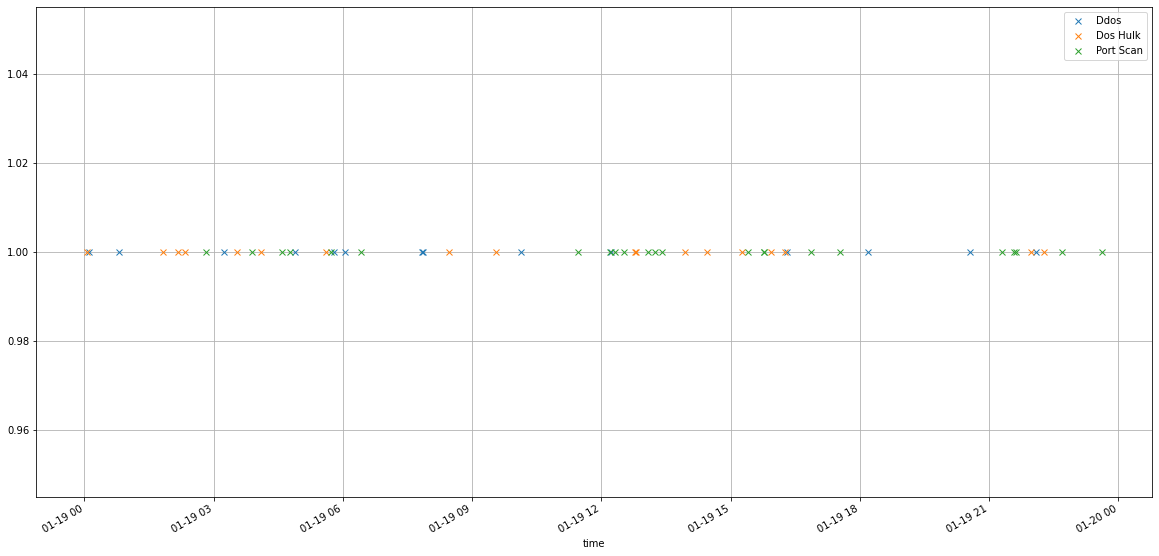

In [ ]:
l1=df_ddos['Target'].plot(style='x', figsize=(20,10))

l2=df_dh['Target'].plot(style='x', figsize=(20,10))
#l3=df_be['Label'].plot(style='.', figsize=(20,10))
l4=df_ps['Target'].plot(style='x', figsize=(20,10))

plt.tick_params(labelsize=10)
plt.legend(['Ddos','Dos Hulk','Port Scan'])

plt.grid()

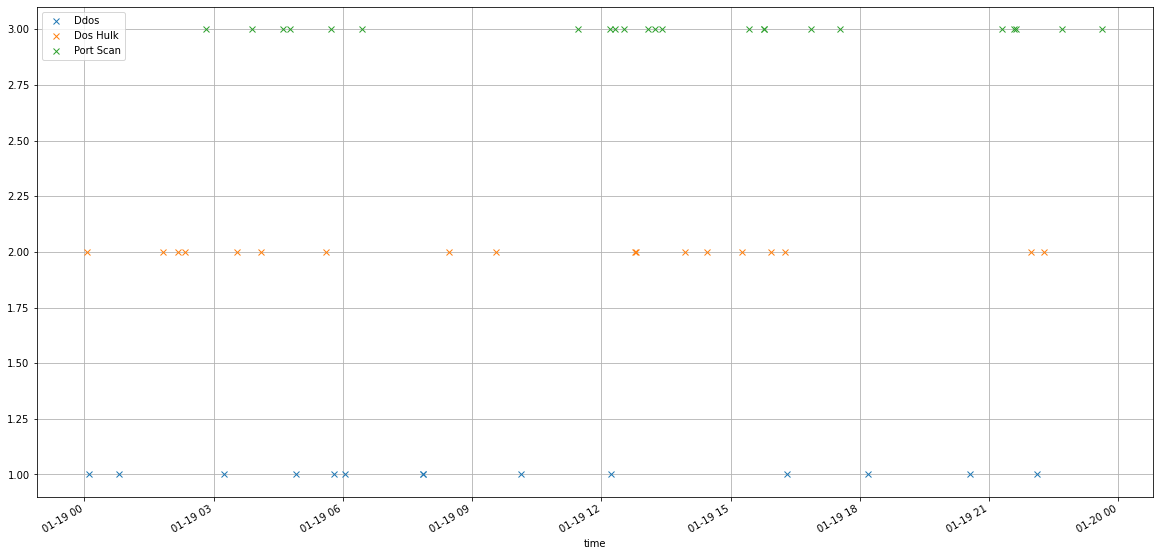

In [ ]:
l1=df_ddos['Label'].plot(style='x', figsize=(20,10))

l2=df_dh['Label'].plot(style='x', figsize=(20,10))
#l3=df_be['Label'].plot(style='.', figsize=(20,10))
l4=df_ps['Label'].plot(style='x', figsize=(20,10))

plt.tick_params(labelsize=10)
plt.legend(['Ddos','Dos Hulk','Port Scan'])

plt.grid()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


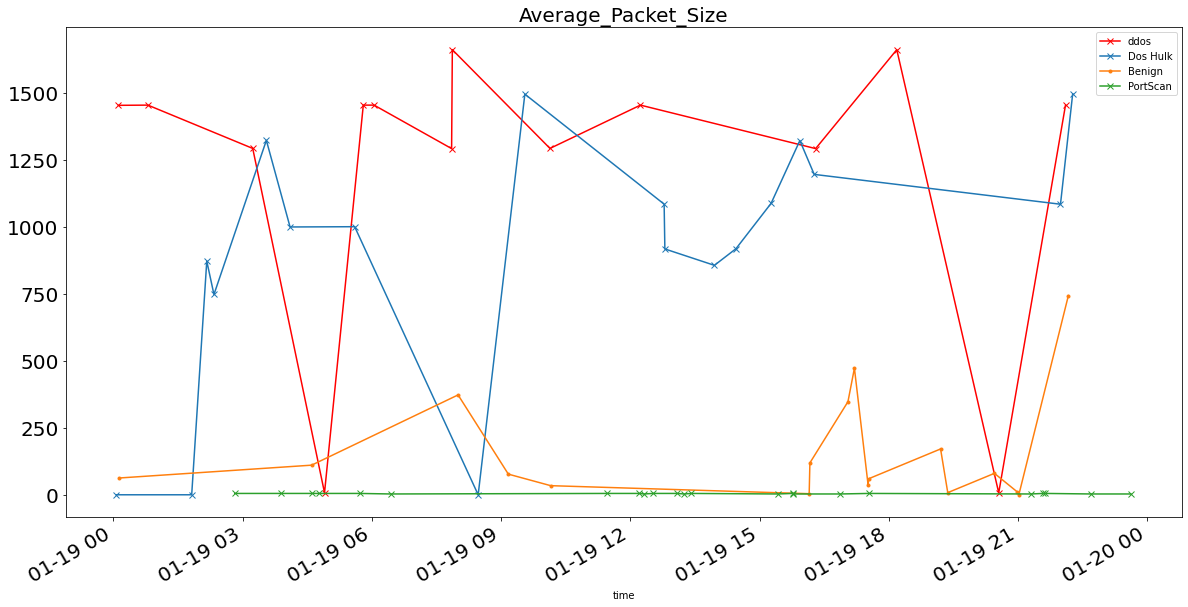

In [ ]:

plt.figure(figsize=(20,10))
feature_plot=feature_last[10]#8
l1=df_ddos[feature_plot].plot(color="red",marker='x',label='a',c='a')
l2=df_dh[feature_plot].plot(marker='x')
l3=df_be[feature_plot].plot(marker='.')
l4=df_ps[feature_plot].plot(marker='x')
plt.legend(['ddos','Dos Hulk','Benign','PortScan'])

plt.tick_params(labelsize=20)
ax = plt.gca()


plt.title(feature_plot,fontsize=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


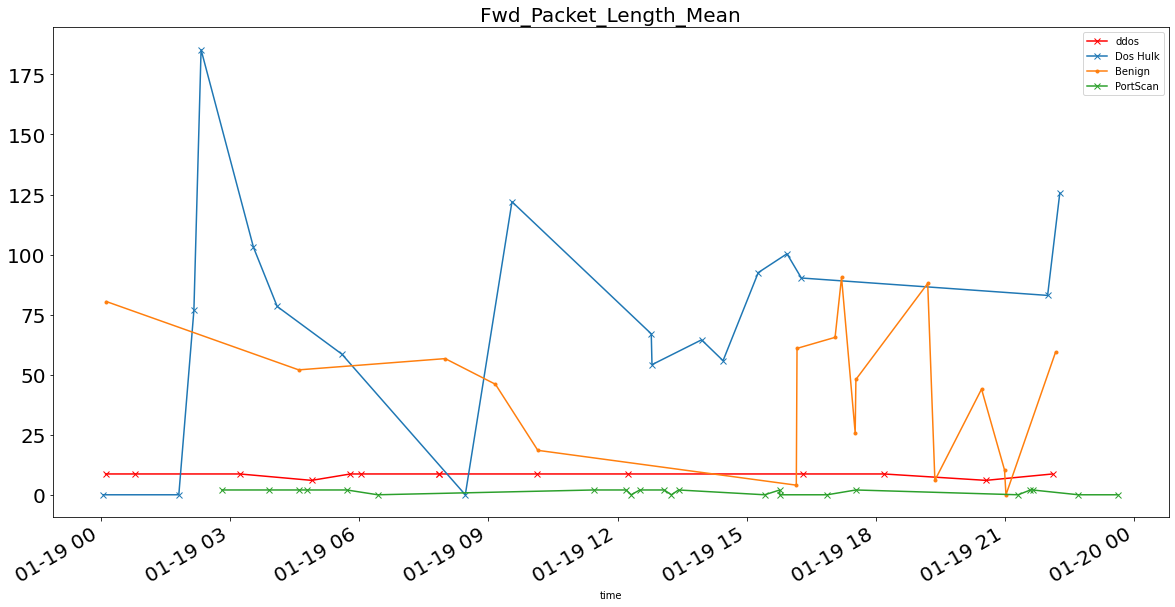

In [ ]:
plt.figure(figsize=(20,10))
feature_plot=feature_last[3]#8
l1=df_ddos[feature_plot].plot(color="red",marker='x',label='a',c='a')
l2=df_dh[feature_plot].plot(marker='x')
l3=df_be[feature_plot].plot(marker='.')
l4=df_ps[feature_plot].plot(marker='x')
plt.legend(['ddos','Dos Hulk','Benign','PortScan'])

plt.tick_params(labelsize=20)
ax = plt.gca()


plt.title(feature_plot,fontsize=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


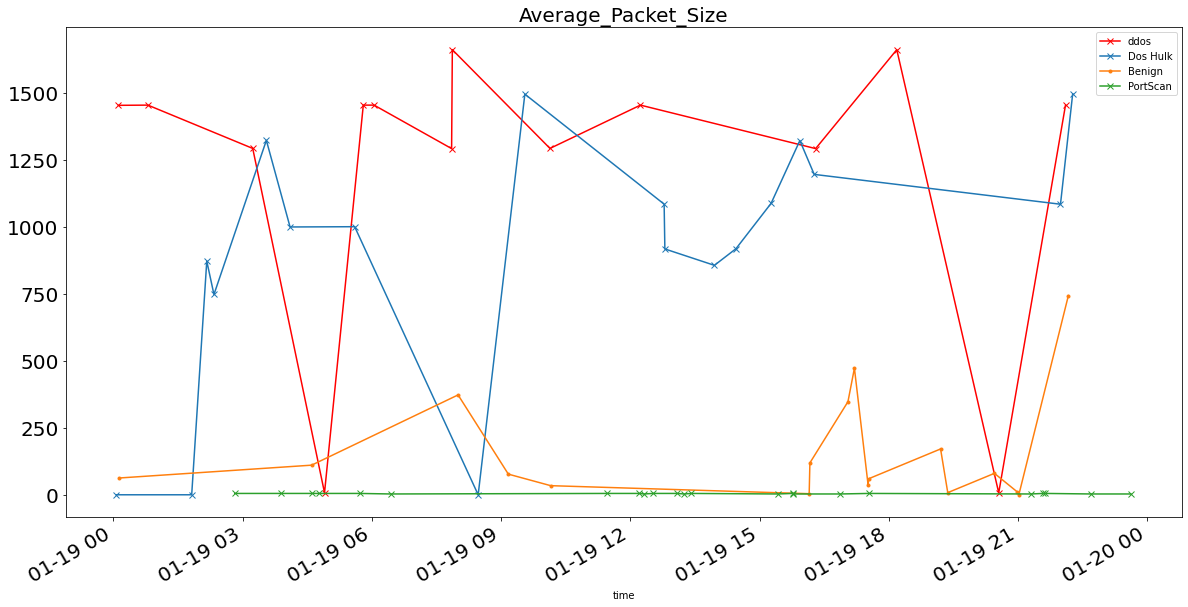

In [ ]:
plt.figure(figsize=(20,10))
feature_plot=feature_last[10]#8
l1=df_ddos[feature_plot].plot(color="red",marker='x',label='a',c='a')
l2=df_dh[feature_plot].plot(marker='x')
l3=df_be[feature_plot].plot(marker='.')
l4=df_ps[feature_plot].plot(marker='x')
plt.legend(['ddos','Dos Hulk','Benign','PortScan'])

plt.tick_params(labelsize=20)
ax = plt.gca()


plt.title(feature_plot,fontsize=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


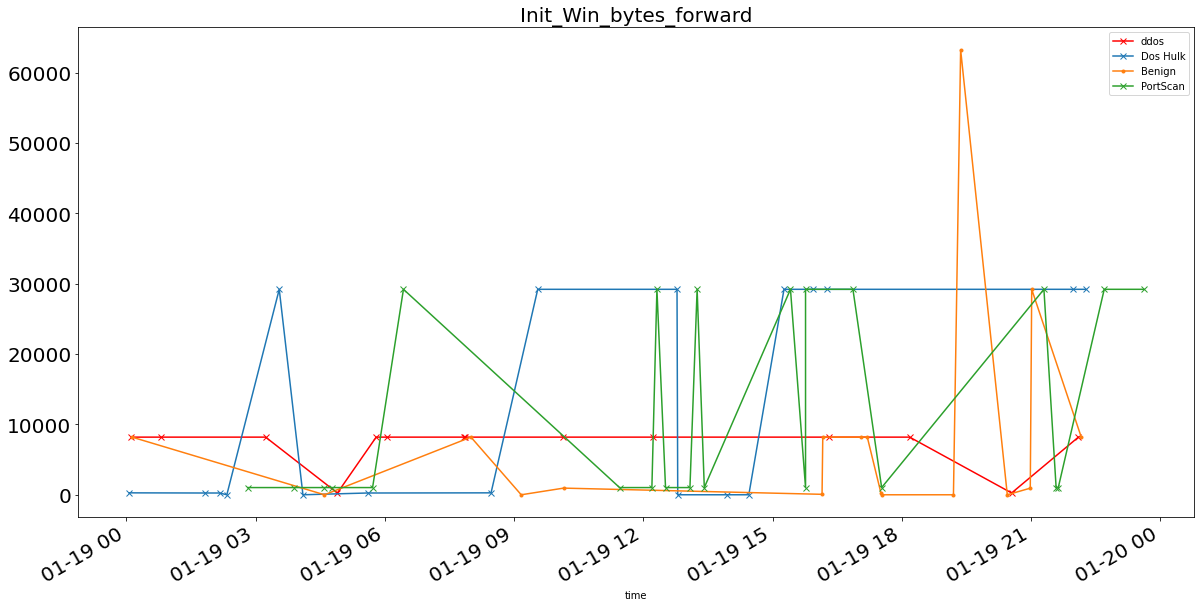

In [ ]:
plt.figure(figsize=(20,10))
feature_plot=feature_last[7]#8
l1=df_ddos[feature_plot].plot(color="red",marker='x',label='a',c='a')
l2=df_dh[feature_plot].plot(marker='x')
l3=df_be[feature_plot].plot(marker='.')
l4=df_ps[feature_plot].plot(marker='x')
plt.legend(['ddos','Dos Hulk','Benign','PortScan'])

plt.tick_params(labelsize=20)
ax = plt.gca()


plt.title(feature_plot,fontsize=20)
plt.show()